In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Microsoft YaHei']

In [2]:
data = np.genfromtxt("Dataset for Homework2-2.txt",dtype=[int,int])

In [7]:
data_frame=pd.DataFrame(data)
g1=nx.from_pandas_edgelist(data_frame,"f0","f1",create_using=nx.Graph())

In [10]:
#绘制不同规模随机网络度分布
def get_pdf(g,kmin,kmax):
    k=list(range(kmin,kmax+1))
    n=len(g.nodes())
    pk=[]
    for ki in k:
        c=0
        for i in g.nodes():
            if g.degree(i)==ki:
                c+=1
        pk.append(c/n)
    return k,pk

#### 平均度k

In [21]:
d=dict(nx.degree(g1))#度分布
print("平均度为：",sum(d.values())/len(g1.nodes))

平均度为： 8.083430596982666


#### 网络平均集聚系数

In [39]:
m=nx.average_clustering(g1)
print("网络平均集聚系数为：",m)

网络平均集聚系数为： 0.6334130270820665


#### 网络全局集聚系数

In [40]:
m=nx.transitivity(g1)
print("网络全局集聚系数为：",m)

网络全局集聚系数为： 0.2643168246385282


#### 网络度分布

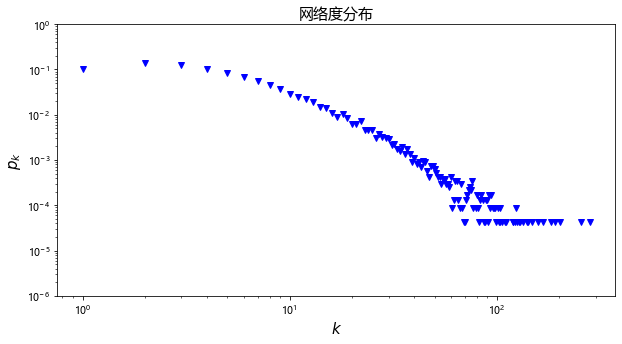

In [20]:
deg1=[g1.degree(i) for i in g1.nodes()]
kmin1,kmax1=min(deg1),max(deg1)
k1,pk1=get_pdf(g1,kmin1,kmax1)
avk1=sum(deg1)/len(g1.nodes())
plt.figure(figsize=(10,5))
plt.plot(k1,pk1,"bv")
plt.xlabel("$k$",fontsize=15)
plt.ylabel("$p_k$",fontsize=15)
plt.title("网络度分布",fontsize=15)
plt.ylim([1e-6,1])
plt.semilogy()
plt.semilogx()
plt.savefig("网络度分布.png")

#### 度分布直方图

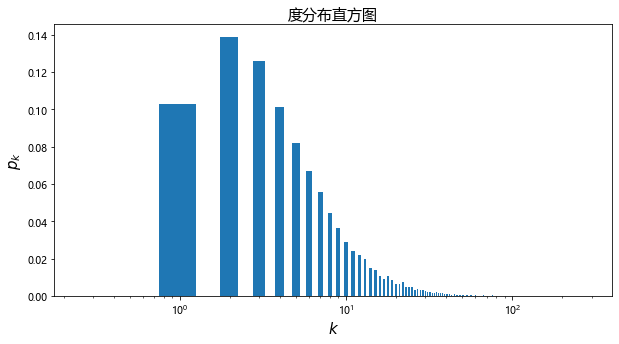

<Figure size 432x288 with 0 Axes>

In [52]:
x=list(range(max(d.values())+1))#绘制直方图学习
y=[i/len(g1.nodes) for i in nx.degree_histogram(g1)]
plt.figure(figsize=(10,5))
plt.bar(x,y,width=0.5)
plt.xlabel("$k$",fontsize=15)
plt.ylabel("$p_k$",fontsize=15)
plt.semilogx()
plt.title("度分布直方图",fontsize=15)
plt.show()
plt.savefig("度分布直方图.png")

 #### 基于pearson相关系数的度度相关性

In [43]:
r1=nx.degree_pearson_correlation_coefficient(g1)
print("度度相关性系数为：",r1)#正关联

度度相关性系数为： 0.13506886900042706


#### 求网络最近邻平均度值 绘制度度相关性图

In [45]:
def average_nearest_neighbor_degree(G):
    k=set([G.degree(i) for i in G.nodes()])
    sorted_k=sorted(k)
    k_nn_k=[]
    for ki in sorted_k:
        c=0
        k_nn_i=0
        for i in G.nodes():
            if G.degree(i)==ki:
                k_nn_i+=sum([G.degree(j) for j in list(nx.all_neighbors(G,i))])/ki
                c+=1
        k_nn_k.append(k_nn_i/c)
    return  sorted_k,k_nn_k

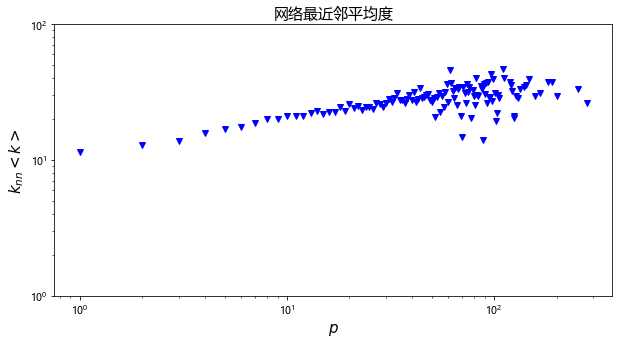

In [51]:
x1,y1=average_nearest_neighbor_degree(g1)
plt.figure(figsize=(10,5))
plt.plot(x1,y1,"bv")
plt.xlabel("$p$",fontsize=15)
plt.ylabel("$k_{nn}<k>$",fontsize=15)
plt.title("网络最近邻平均度",fontsize=15)
plt.xscale("log")
plt.yscale("log")
plt.ylim([1,100])
plt.savefig("网络最近邻平均度.png")

#### 集聚系数绘制

In [71]:
def C_vs_k(g):
    klist=[g.degree(i) for i in g.nodes()]
    all_c={i:nx.clustering(g1,i) for i in g.nodes()}
    all_k=list(set(klist))
    c_k={}
    for k in sorted(all_k):
        s=0
        j=0
        for i in g.nodes():
            if g.degree(i)==k:
                j=j+1
                s=s+all_c[i]
        avc_k=s/j
        c_k[k]=avc_k
    return c_k

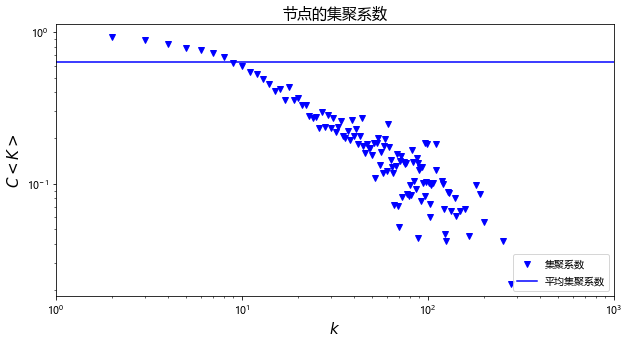

In [75]:
c_k=C_vs_k(g1)
avc=nx.average_clustering(g1)
x=np.linspace(1,1000,1000)
y=[avc]*1000
plt.figure(figsize=(10,5))
plt.title("节点的集聚系数",fontsize=15)
plt.plot(c_k.keys(),c_k.values(),"bv",label="集聚系数")
plt.plot(x,y,"b-",label="平均集聚系数")
plt.semilogx()
plt.semilogy()
plt.legend(loc="best")
plt.xlabel("$k$",fontsize=15)
plt.ylabel("$C<K>$",fontsize=15)
plt.xlim([1,1e3])
plt.savefig("节点的集聚系数.png")

#### 网络中心性指标

In [70]:
#度中心性
dc1=nx.degree_centrality(g1)
#特征向量中心性
ec1=nx.eigenvector_centrality(g1)

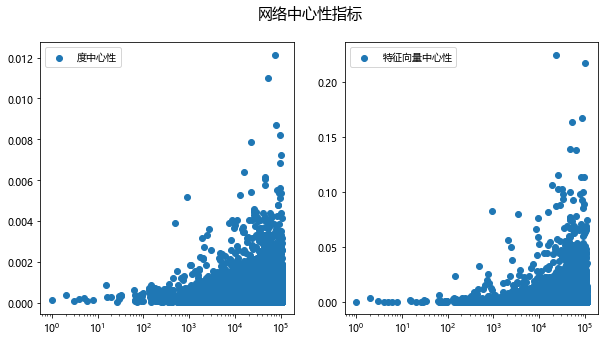

<Figure size 432x288 with 0 Axes>

In [69]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.semilogx()
plt.scatter(dc1.keys(),dc1.values(),label="度中心性")
plt.legend()
plt.subplot(122)
plt.semilogx()
plt.scatter(ec1.keys(),ec1.values(),label="特征向量中心性")
plt.legend()
plt.suptitle("网络中心性指标",fontsize=15)
plt.show()
plt.savefig("网络中心性指标.png")